In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [3]:
digits = datasets.load_digits()
print (digits.images[0])
print (digits.images[0].shape)

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
(8, 8)


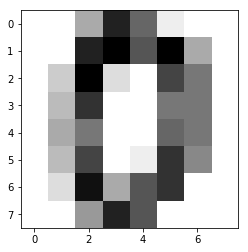

In [4]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

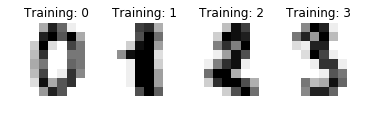

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

In [7]:
n_samples = len(digits.images)
print ('number of images', n_samples)
data = digits.images.reshape((n_samples, -1))
print ('train_matrix_shape', data.shape)

number of images 1797
train_matrix_shape (1797, 64)


In [8]:
train_data = data[:n_samples // 2]
train_label = digits.target[:n_samples // 2]
print (train_data.shape)
print (len(train_label))
train_label

(898, 64)
898


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3,
       9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8,
       2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0,
       9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8,
       2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8,
       2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0,
       5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 5, 4, 8, 8, 4, 9, 0,
       8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
       0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1,
       7, 7,

In [9]:
test_data = data[n_samples // 2:]
test_label = digits.target[n_samples // 2:]

In [10]:
classifier = svm.SVC(gamma=0.001)
classifier.fit(train_data, train_label)
predicted = classifier.predict(test_data)
expected = test_label

In [11]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  

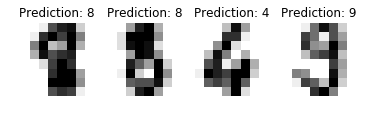

In [12]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

 # Random Forest Tree

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
classifier1 = RandomForestClassifier(max_depth=2, random_state=0)
classifier1.fit(train_data, train_label)
predicted1 = classifier1.predict(test_data)
expected1 = test_label

In [15]:
print("Classification report for %s:\n%s\n"
      % (classifier1, metrics.classification_report(expected1, predicted1)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected1, predicted1))

Classification report for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.85      0.99      0.92        88
          1       0.74      0.44      0.55        91
          2       0.72      0.73      0.73        86
          3       0.48      0.80      0.60        91
          4       0.67      0.85      0.75        92
          5       0.78      0.23      0.36        91
          6       0.93      0.95      0.94        91
          7       0.60      0.88      0.72        89
          8       0.69      0.31      0.43        88
          9       0.74      0.79      0.76        92

avg / total

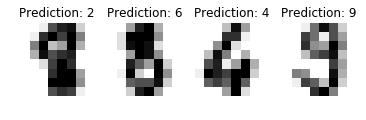

In [20]:
images_and_predictions1 = list(zip(digits.images[n_samples // 2:], predicted1))
for index, (image, prediction1) in enumerate(images_and_predictions1[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction1)

plt.show()

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
classifier2 = LogisticRegression()
classifier2.fit(train_data, train_label)
predicted2 = classifier2.predict(test_data)
expected2 = test_label
print("Classification report for %s:\n%s\n"
      % (classifier2, metrics.classification_report(expected2, predicted2)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected2, predicted2))

Classification report for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.94      0.97      0.96        88
          1       0.86      0.89      0.88        91
          2       0.98      0.98      0.98        86
          3       0.99      0.82      0.90        91
          4       0.99      0.93      0.96        92
          5       0.83      0.90      0.86        91
          6       0.94      0.99      0.96        91
          7       0.98      0.89      0.93        89
          8       0.89      0.88      0.88        88
          9       0.83      0.92      0.87        92

avg / total       0.92      0.92      0.92       899


Confusion matrix:
[[85  0  0  0  1  1  1  0  0  0]
 [ 0 81  0  1  0 

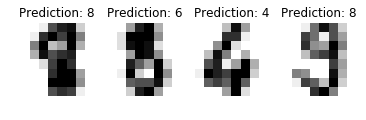

In [23]:
images_and_predictions2 = list(zip(digits.images[n_samples // 2:], predicted2))
for index, (image, prediction2) in enumerate(images_and_predictions2[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction2)

plt.show()

pwd
